In [2]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
import statistics
warnings.filterwarnings("ignore")


In [3]:

train2 = pd.read_csv('../data/greek_web_scraping_emb.csv')
train2_1 = pd.read_csv('../data/greek_web_scraping.csv')
train5 = pd.read_csv('../data/cyprus_factcheck_emb.csv')

train2 = unravel_df(train2, ['text_embedding'])
train5 = unravel_df(train5, ['text_embedding'])

In [4]:
#find whick grek data is from greekhoaxes etc
train2_1 = train2_1[['id','url']]
train2_1['source'] = train2_1['url'].apply(lambda x: 0 if "ellinikahoaxes" in x else (1 if "factcheckgreek" in x else None))
train2 = pd.merge(train2, train2_1[['id','source']], on='id', how='inner')


In [5]:
train5['source'] = 2

In [6]:
df_train = pd.concat([train2,train5], ignore_index=True)

In [7]:
df_train.source.value_counts()

1    307
0    219
2    129
Name: source, dtype: int64

In [8]:
NaiveBayes_list  = list()
LR_list  = list()
KNeigh_list  = list()
RF_list  = list()
DT_list  = list()
SVC_list  = list()
MLP_list  = list()

data_source_train_list = list()
data_source_val_list = list()

In [9]:
#list for sub accuracies
NaiveBayes_list_acc  = list()
LR_list_acc  = list()
KNeigh_list_acc  = list()
RF_list_acc  = list()
DT_list_acc  = list()
SVC_list_acc  = list()
MLP_list_acc  = list()



In [10]:

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_index, valid_index) in enumerate(kf.split(df_train.text_embedding), 1):

    X_train, X_valid = [df_train.text_embedding[i] for i in train_index], [df_train.text_embedding[i] for i in valid_index ]
    y_train, y_valid = df_train.label[train_index] , df_train.label[valid_index]
    data_source_train, data_source_val = df_train.source[train_index], df_train.source[valid_index]
    

    print(f"Fold {fold}:")
    print("Training data:\n ")
    print(data_source_train.value_counts(), '\n')
    print("Validation data:\n ")
    print(data_source_val.value_counts())
    print("---------------------")

    data_source_train_list.append(data_source_train.value_counts())
    data_source_val_list.append(data_source_val.value_counts())

   
    
    

    nb1, nb2 = cross_val_Naive_Bayes(X_train, y_train, X_valid, y_valid, data_source_val)
    lr1, lr2 = cross_val_LR(X_train, y_train, X_valid, y_valid, data_source_val)
    kn1, kn2 = cross_val_Kneigh(X_train, y_train, X_valid, y_valid, data_source_val)
    svm1, svm2 = cross_val_SVC(X_train, y_train, X_valid, y_valid, data_source_val)
    rf1, rf2 = cross_val_RF(X_train, y_train, X_valid, y_valid, data_source_val)
    dt1, dt2 = cross_val_DT(X_train, y_train, X_valid, y_valid, data_source_val)
    mlp1, mlp2 = cross_val_MLP(X_train, y_train, X_valid, y_valid, data_source_val)

    NaiveBayes_list.append(nb1)
    NaiveBayes_list_acc.append(nb2)

    LR_list.append(lr1)
    LR_list_acc.append(lr2)
 
    KNeigh_list.append(kn1)
    KNeigh_list_acc.append(kn2)

    SVC_list.append(svm1)
    SVC_list_acc.append(svm2)

    RF_list.append(rf1)
    RF_list_acc.append(rf2)

    DT_list.append(dt1)
    DT_list_acc.append(dt2)

    MLP_list.append(mlp1)
    MLP_list_acc.append(mlp2)
    


    


    

Fold 1:
Training data:
 
1    283
0    193
2    113
Name: source, dtype: int64 

Validation data:
 
0    26
1    24
2    16
Name: source, dtype: int64
---------------------
[2, 10, 30, 31, 44, 54, 55, 63, 69, 72, 76, 78, 81, 90, 108, 120, 131, 145, 148, 155, 174, 192, 199, 211, 212, 215]

Accuracy for data source 0: 0.9615384615384616
[247, 257, 264, 275, 277, 278, 289, 290, 296, 299, 333, 335, 349, 350, 360, 369, 370, 383, 430, 442, 445, 446, 481, 503]

Accuracy for data source 1: 0.9166666666666666
[533, 536, 538, 574, 576, 579, 587, 610, 612, 617, 629, 638, 641, 642, 650, 651]

Accuracy for data source 2: 0.6875
Accuracy for Naive Bayes: 0.8787878787878788

[(0, 0.9615384615384616), (1, 0.9166666666666666), (2, 0.6875)]

Accuracy for data source 0: 0.9615384615384616

Accuracy for data source 1: 0.9166666666666666

Accuracy for data source 2: 0.875
Accuracy for LR: 0.9242424242424242

[(0, 0.9615384615384616), (1, 0.9166666666666666), (2, 0.875)]


  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Accuracy for data source 0: 0.8076923076923077

Accuracy for data source 1: 0.875

Accuracy for data source 2: 0.875
Accuracy for KNeigh: 0.8484848484848485

[(0, 0.8076923076923077), (1, 0.875), (2, 0.875)]

Accuracy for data source 0: 0.9230769230769231

Accuracy for data source 1: 0.9583333333333334

Accuracy for data source 2: 0.6875
Accuracy for SVM: 0.8787878787878788

[(0, 0.9230769230769231), (1, 0.9583333333333334), (2, 0.6875)]

Accuracy for data source 0: 0.9230769230769231

Accuracy for data source 1: 0.9583333333333334

Accuracy for data source 2: 1.0
Accuracy for Random Forest: 0.9545454545454546

[(0, 0.9230769230769231), (1, 0.9583333333333334), (2, 1.0)]

Accuracy for data source 0: 0.6923076923076923

Accuracy for data source 1: 0.75

Accuracy for data source 2: 1.0
Accuracy for Decision Tree: 0.7878787878787878

[(0, 0.6923076923076923), (1, 0.75), (2, 1.0)]

Accuracy for data source 0: 0.9230769230769231

Accuracy for data source 1: 0.9583333333333334

Accuracy for

In [11]:
print("NB: ",statistics.stdev(NaiveBayes_list))
print("LR: ", statistics.stdev(LR_list))
print("k-Neigh: ", statistics.stdev(KNeigh_list))
print("SVC: ", statistics.stdev(SVC_list))
print("RF: ", statistics.stdev(RF_list))
print("DT: ", statistics.stdev(DT_list))
print("MLP: ", statistics.stdev(MLP_list))

NB:  0.021211921980217128
LR:  0.03242636593339383
k-Neigh:  0.02802589133255862
SVC:  0.028626347366084066
RF:  0.02590829834219482
DT:  0.0740400978546605
MLP:  0.022519085795341322


In [12]:
df_corr = pd.DataFrame( {'factcheckgreek_train_count':[data_source_train_list[i][1] for i in range (len(data_source_train_list))], 
                        'greekhoaxes_train_count': [data_source_train_list[j][0] for j in range (len(data_source_train_list))],
                        'cyprus_train_count': [data_source_train_list[j][2] for j in range (len(data_source_train_list))],
                        'factcheckgreek_val_count':[data_source_val_list[i][1] for i in range (len(data_source_val_list))], 
                        'greekhoaxes_val_count': [data_source_val_list[j][0] for j in range (len(data_source_val_list))],
                        'cyprus_val_count': [data_source_val_list[j][2] for j in range (len(data_source_val_list))],

                        'NB_grekhoaxes_acc': [t[0][1] for t in NaiveBayes_list_acc], 'NB_factcheck_acc': [t[1][1] for t in NaiveBayes_list_acc],'NB_cyprus_acc': [t[2][1] for t in NaiveBayes_list_acc],
                        'LR_grekhoaxes_acc': [t[0][1] for t in LR_list_acc], 'lr_factcheck_acc': [t[1][1] for t in LR_list_acc],'lr_cyprus_acc': [t[2][1] for t in LR_list_acc],
                        'kn_grekhoaxes_acc': [t[0][1] for t in KNeigh_list_acc], 'kn_factcheck_acc': [t[1][1] for t in KNeigh_list_acc],'kn_cyprus_acc': [t[2][1] for t in KNeigh_list_acc],
                        'rf_grekhoaxes_acc': [t[0][1] for t in RF_list_acc], 'rf_factcheck_acc': [t[1][1] for t in RF_list_acc],'rf_cyprus_acc': [t[2][1] for t in RF_list_acc],
                        'dt_grekhoaxes_acc': [t[0][1] for t in DT_list_acc], 'dt_factcheck_acc': [t[1][1] for t in DT_list_acc],'dt_cyprus_acc': [t[2][1] for t in DT_list_acc],
                        'svc_grekhoaxes_acc': [t[0][1] for t in SVC_list_acc], 'svc_factcheck_acc': [t[1][1] for t in SVC_list_acc],'svc_cyprus_acc': [t[2][1] for t in SVC_list_acc],
                        'mlp_grekhoaxes_acc': [t[0][1] for t in MLP_list_acc], 'mlp_factcheck_acc': [t[1][1] for t in MLP_list_acc],'mlp_cyprus_acc': [t[2][1] for t in MLP_list_acc],
                         


                        'NB_accuracy': NaiveBayes_list,'LR_accuracy': LR_list,'kn_accuracy': KNeigh_list,'RF_accuracy': RF_list,
                        'DT_accuracy': DT_list,'SVC_accuracy': SVC_list,'MLP_accuracy': MLP_list})


models = ['NB_', 'LR_', 'KN_', 'svc_', 'dt_','rf_','mlp_']
data = ['train','val']
sources = ['greekhoaxes_','factcheckgreek_','cyprus_']

for s in sources:
    for d in data:
        column = s + d + '_per'
        df_corr[column] = df_corr[s+d+'_count']/(sum(df_corr[s+d+'_count'] for s in sources))






In [23]:
df_corr.iloc[:, :6]

,factcheckgreek_train_count,greekhoaxes_train_count,cyprus_train_count,factcheckgreek_val_count,greekhoaxes_val_count,cyprus_val_count
0,283,193,113,24,26,16
1,280,192,117,27,27,12
2,275,198,116,32,21,13
3,274,196,119,33,23,10
4,279,197,113,28,22,16
5,276,199,115,31,20,14
6,269,200,121,38,19,8
7,272,206,112,35,13,17
8,280,193,117,27,26,12
9,275,197,118,32,22,11


In [25]:
df_corr.iloc[:, 6:9]

,NB_grekhoaxes_acc,NB_factcheck_acc,NB_cyprus_acc
0,0.961538,0.916667,0.687500
1,0.925926,0.925926,0.666667
2,0.952381,0.937500,0.769231
3,0.956522,0.969697,0.500000
4,0.954545,0.964286,0.687500
5,0.950000,0.903226,0.785714
6,0.947368,0.947368,0.750000
7,0.923077,0.942857,0.705882
8,1.000000,0.962963,0.750000
9,1.000000,0.875000,0.636364


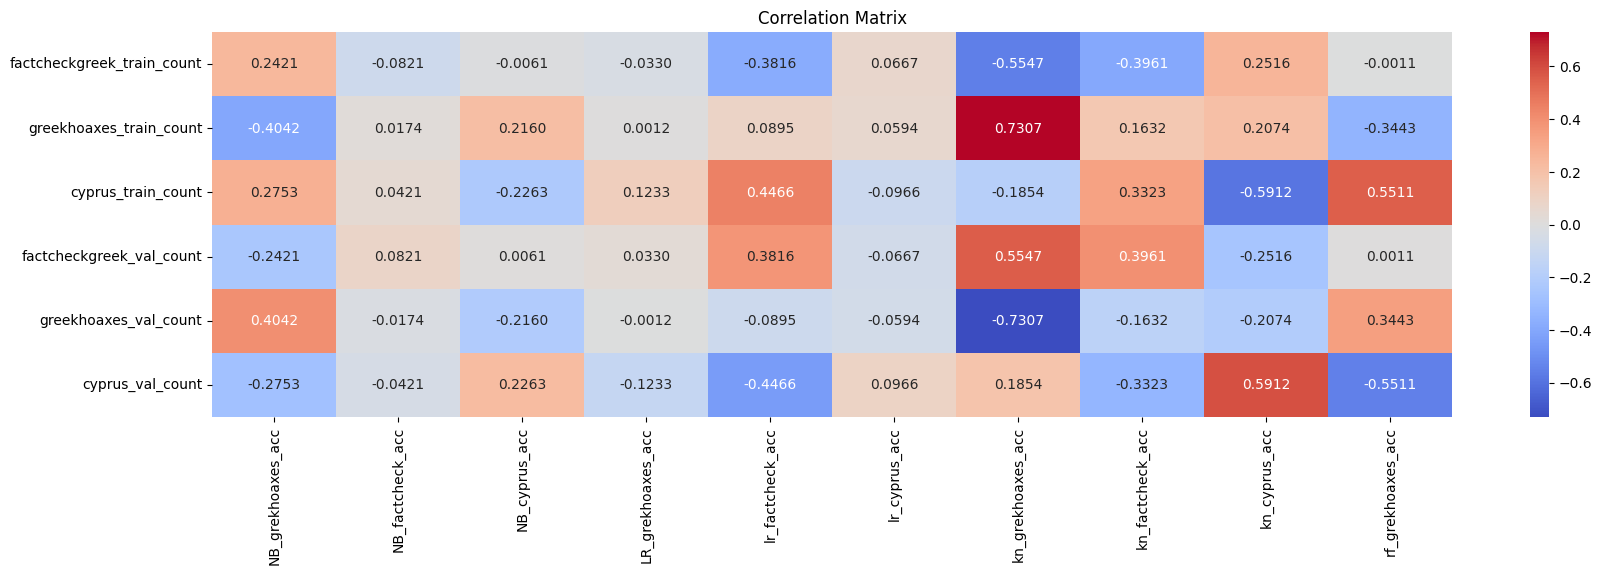

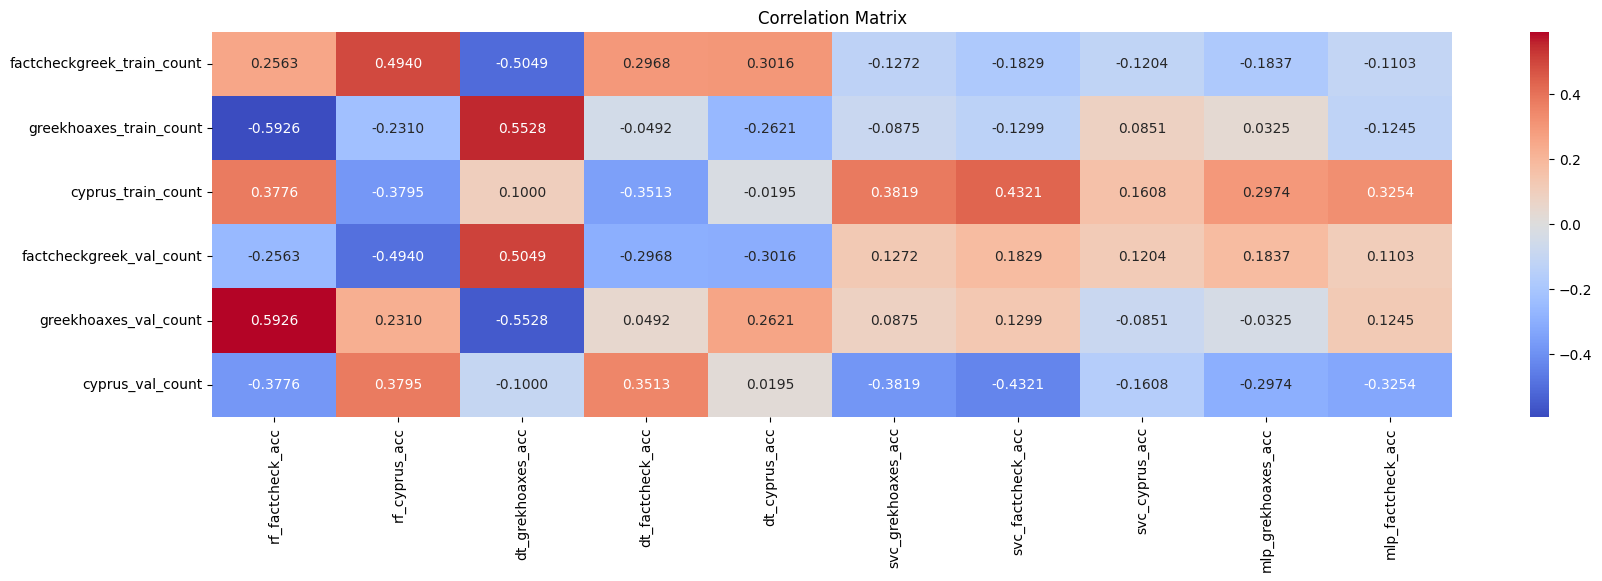

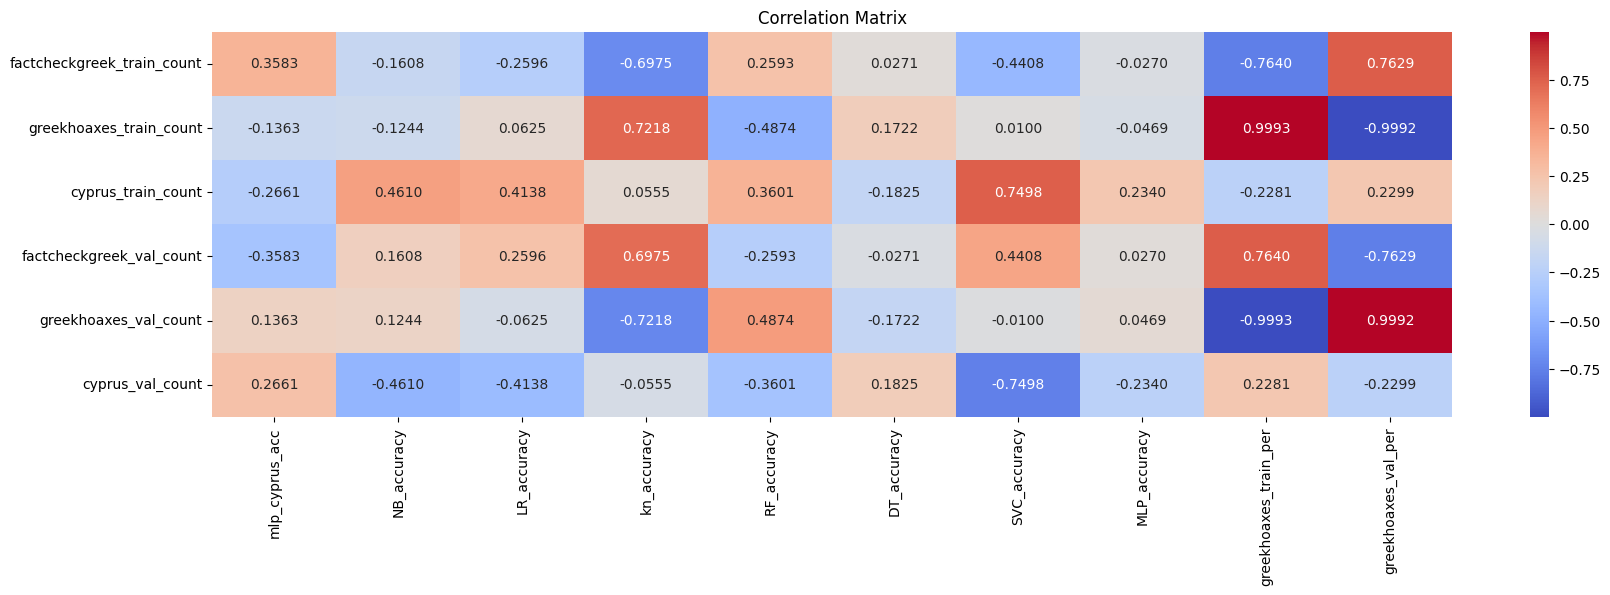

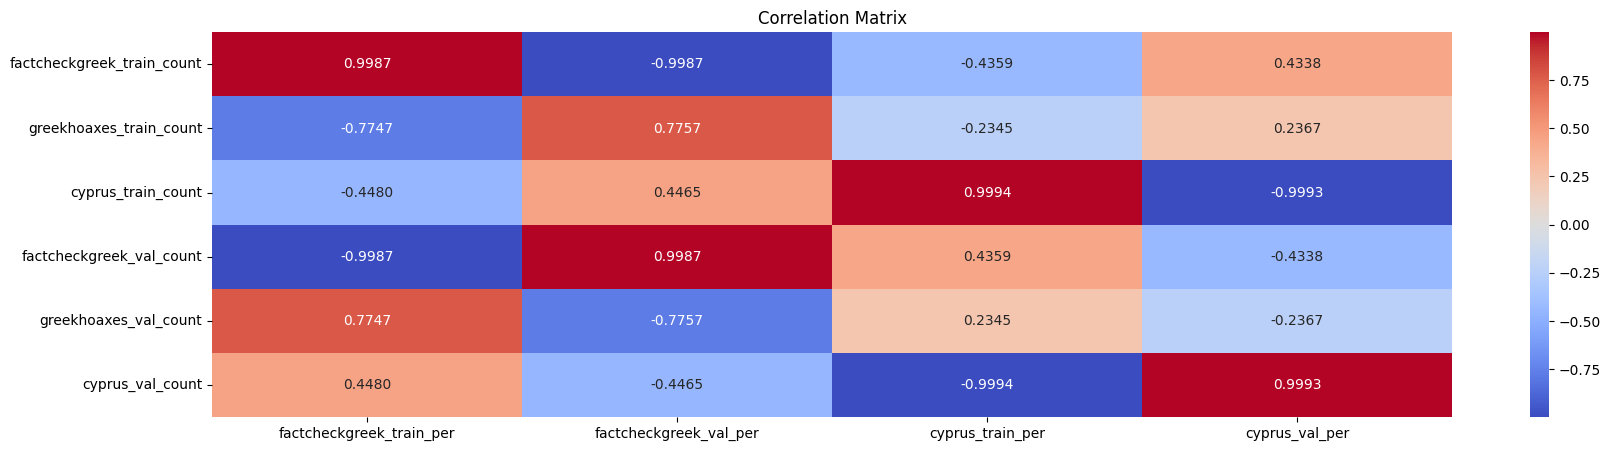

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_corr.corr()

for i in range(6,40,10):
    # Plot the correlation matrix using Seaborn
    plt.figure(figsize=(20, 5))
    sns.heatmap(correlation_matrix.iloc[:6,i:i+10], annot=True, cmap='coolwarm', fmt=".4f")
    plt.title('Correlation Matrix')
    plt.show()